## Model

$$
\dfrac{d\vec{r}(t)}{dt} = \vec{\Omega}(t) \times \vec{r}(t)\qquad (1)
$$

Tomamos:

- $\vec{r}(t) = (r_1(t), r_2(t), r_3(t)) \in \mathbb{R}^3$
- $\Vert \vec{r}(t) \Vert = 1$

- $\vec{\Omega}(t) = (\Omega_1(t), \Omega_2(t), 0) \in \mathbb{R}^3$

En particular tomamos:

- $\Omega_1(t) = \dfrac{-2\mu E_x(t)}{\hbar}$
- $\Omega_2(t) = \dfrac{-2\mu E_y(t)}{\hbar}$

We substitute into eq. (1),

- $r_1'(t) = \Omega_2(t)r_3(t)$
- $r_2'(t) = -\Omega_1(t)r_3(t)$
- $r_3'(t) = \Omega_1(t)r_2(t) - \Omega_2(t)r_1(t)$

Assume that

- $E_x(t) = E_{x, 0}\sin (\omega t)$
- $E_y(t) = E_{y, 0}\cos (\omega t)$

## Implementation

In [7]:
using ReachabilityAnalysis, Plots, LaTeXStrings

In [11]:
@taylorize function rotating!(du, u, p, t)
    r₁, r₂, r₃ = u

    local μ = 1.0
    local ħ = 1.0
    α = -2μ/ħ

    local Ex₀ = 1.0
    local Ey₀ = 1.0
    local ω₀ = 1.0

    Ex = Ex₀ * cos(ω₀ * t)
    Ey = Ey₀ * sin(ω₀ * t)
    
    Ω₁ = -α * Ex
    Ω₂ = -α * Ey
    du[1] = Ω₂ * r₃
    du[2] = -Ω₁ * r₃
    du[3] = Ω₁*r₂ - Ω₂ * r₁
    return du
end

## Results with initial point

First we consider that the initial state is $X_0 = r_0 = (1, 1, 1)$.

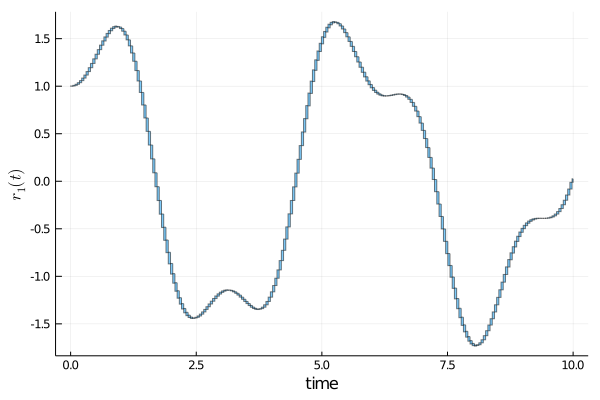

In [32]:
#prob = @ivp(r' = rotating!(r), dim=3, r(0) ∈ zeros(3)) # FIXME
prob = @ivp(r' = rotating!(r), dim=3, r(0) ∈ Singleton(ones(3)))

sol = solve(prob, tspan=(0.0, 10.0))
solz = overapproximate(sol, Zonotope);
plot(solz, vars=(0, 1), xlab="time", ylab=L"r_1(t)")

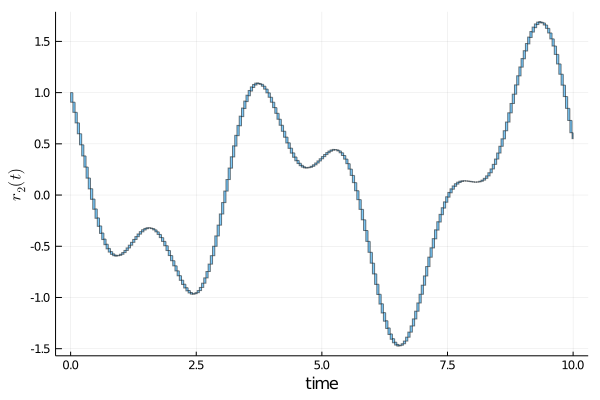

In [33]:
plot(solz, vars=(0, 2), xlab="time", ylab=L"r_2(t)")

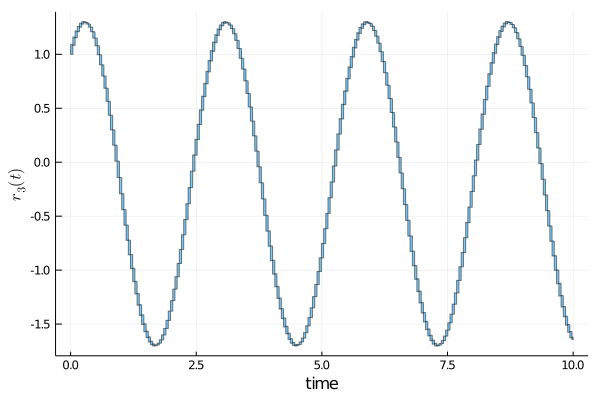

In [34]:
plot(solz, vars=(0, 3), xlab="time", ylab=L"r_3(t)")

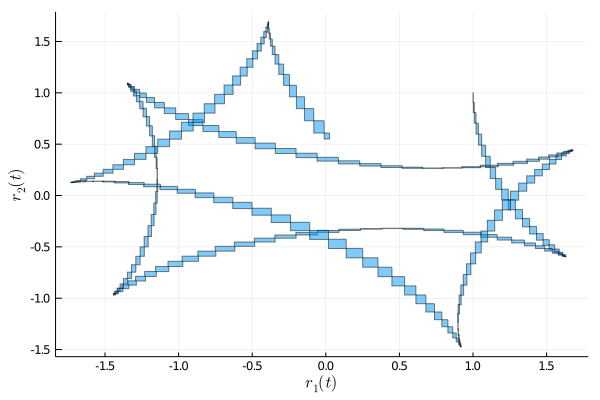

In [35]:
plot(solz, vars=(1, 2), xlab=L"r_1(t)", ylab=L"r_2(t)")

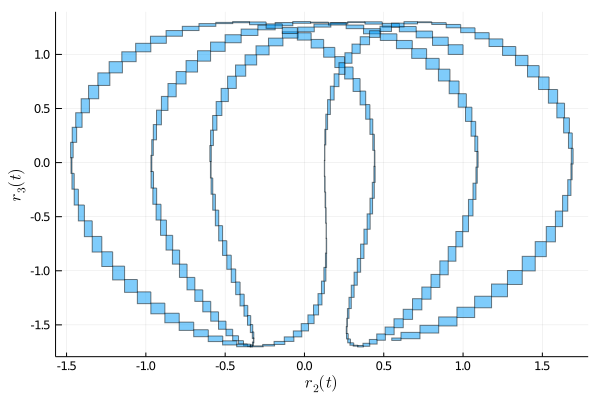

In [36]:
plot(solz, vars=(2, 3), xlab=L"r_2(t)", ylab=L"r_3(t)")

## Results with initial set

Now we will consider that the set of initial states is centered around $(1, 1, 1)$, in particular:

$$
X_0 := \{ x \in \mathbb{R}^3 : \vert 1 - x_i \vert \leq \varepsilon, \forall i = 1,2, 3 \}
$$

For the plots below we have chosen $\varepsilon = 0.1$.

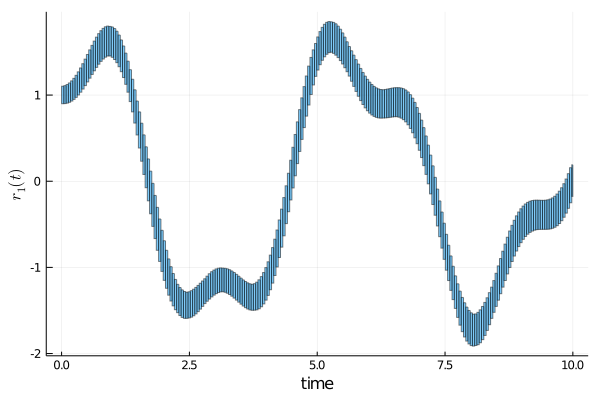

In [26]:
prob = @ivp(r' = rotating!(r), dim=3, r(0) ∈ Singleton(ones(3)) ⊕ BallInf(zeros(3), 1e-1))

sol = solve(prob, tspan=(0.0, 10.0))
solz = overapproximate(sol, Zonotope);
plot(solz, vars=(0, 1), xlab="time", ylab=L"r_1(t)")

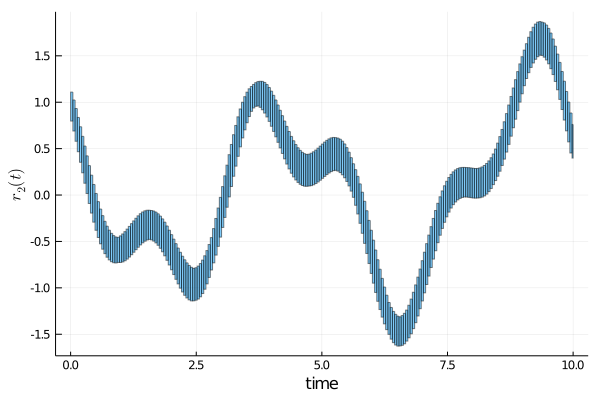

In [27]:
plot(solz, vars=(0, 2), xlab="time", ylab=L"r_2(t)")

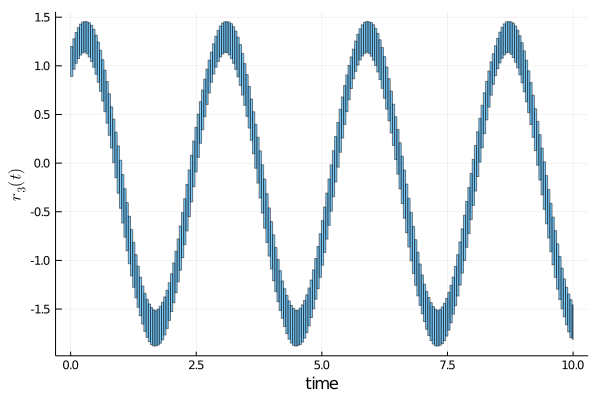

In [28]:
plot(solz, vars=(0, 3), xlab="time", ylab=L"r_3(t)")

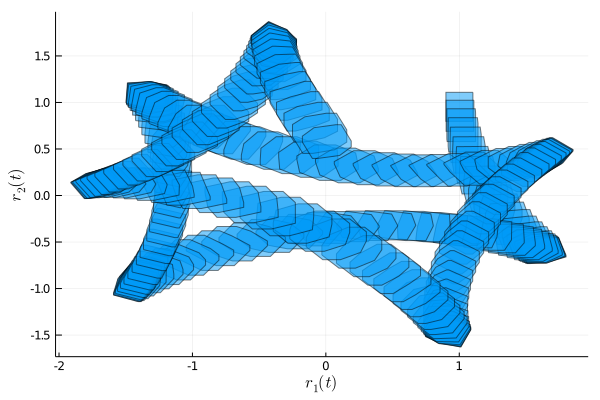

In [29]:
plot(solz, vars=(1, 2), xlab=L"r_1(t)", ylab=L"r_2(t)")

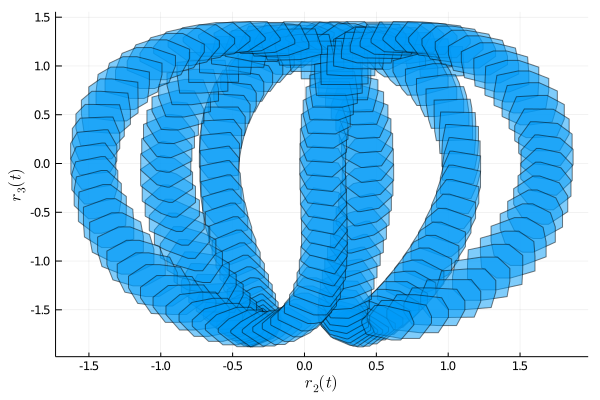

In [30]:
plot(solz, vars=(2, 3), xlab=L"r_2(t)", ylab=L"r_3(t)")